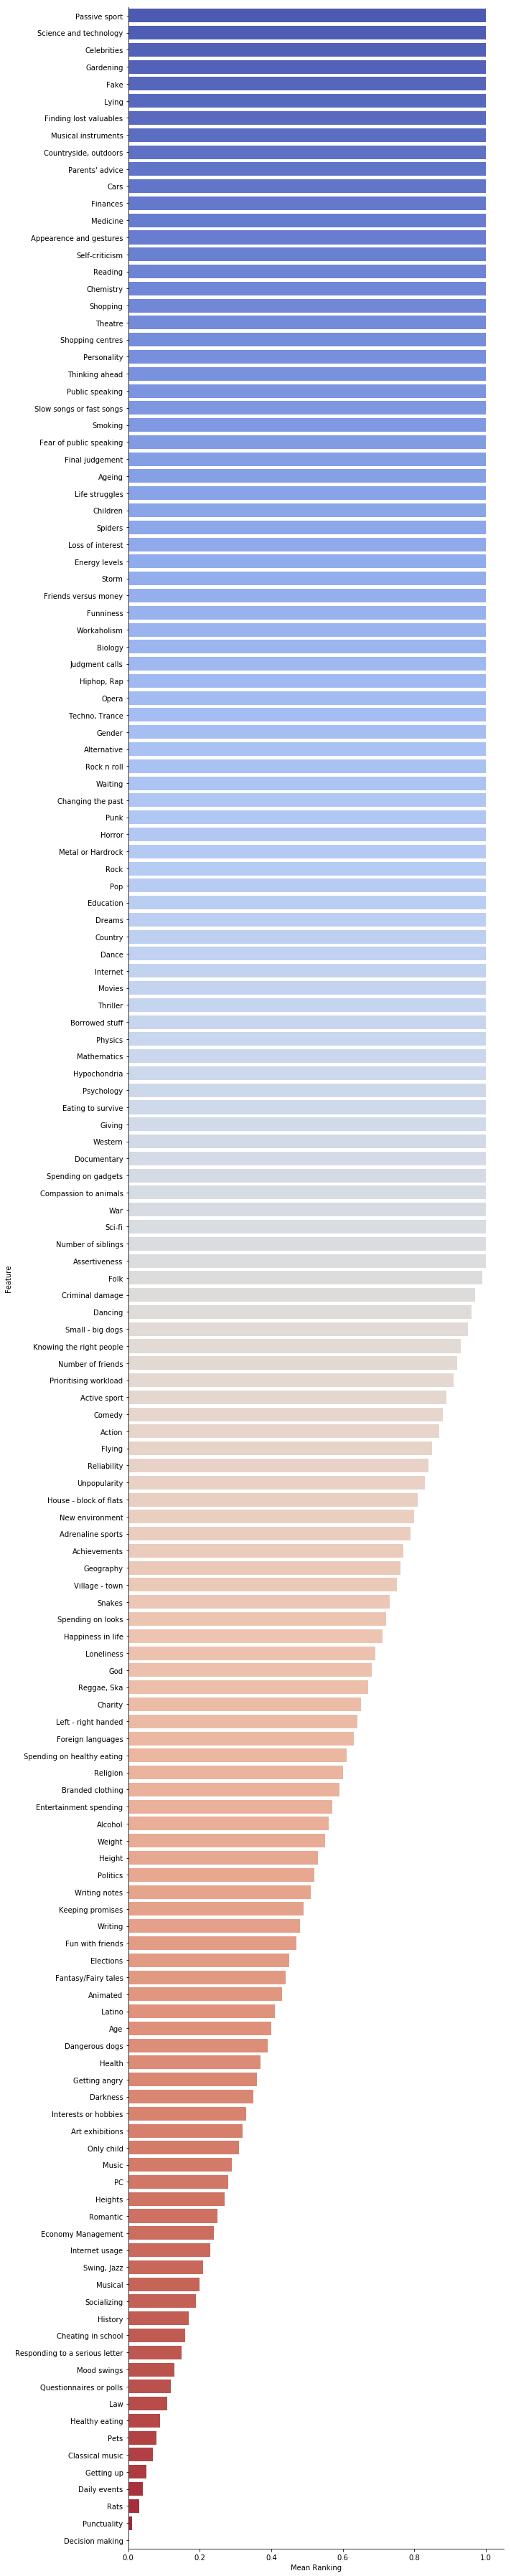

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import handle_dataset
from main import ranking
from sklearn import svm
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

ranks = {}
data = handle_dataset.peopleData
# rlasso = RandomizedLasso(alpha=0.04)
# rlasso.fit(data.X, data.Y)
# ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), data.words)
# svm = get_trained_SVM_model(data.X, data.Y, False)
# # stop the search when only the last feature is left
rfe = RFE(LogisticRegression())
rfe = rfe.fit(data.X, data.Y)
rfx_Xtr = rfe.transform(data.X)
rfx_Xte = rfe.transform(data.Xte)

ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), data.words, order=-1)

# ridge = Ridge(alpha=7)
# ridge.fit(data.X, data.Y)
# ranks['Ridge'] = ranking(np.abs(ridge.coef_), data.words)

# rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=1)
# rf.fit(data.X, data.Y)
# ranks["RF"] = ranking(rf.feature_importances_, data.words)

r = {}
for name in data.words:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
# print("\t%s" % "\t".join(methods))
# for name in data.words:
#     print("%s\t%s" % (name, "\t".join(map(str, 
#                          [ranks[method][name] for method in methods]))))
    
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)



# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=50, aspect = .2, palette='coolwarm')

